# Wine Quality

This lab is based in the AWS-course for machine learning foundations, module 3, section 1, first question:

Question: Based on the composition of the wine, can you predict the quality and therefore the price?

Why:
* View statistics
* Deal with outliers
* Scale numeric data

Citation
Source: [UCI Wine quality dataset](https://archive.ics.uci.edu/ml/datasets/wine+quality) _-> already downloaded!_

Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml](http://archive.ics.uci.edu/ml). Irvine, CA: University of California, School of Information and Computer Science. 

P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. 
Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009.


Step 1: load both files (you can ignore the names-file) in one dataframe. __One-hot encode the color of the wine!__ Check out the shape and NA's of the dataset.

In [8]:
import pandas as pd

wine = pd.read_csv('files/wine+quality/winequality-red.csv', sep=';')
wine["red"] = 1
wine["white"] = 0
white_wine = pd.read_csv('files/wine+quality/winequality-white.csv', sep=';')
white_wine["red"] = 0
white_wine["white"] = 1

wine = pd.concat([wine, white_wine], axis=0, ignore_index=True)

print(wine.shape)
print(wine.info())

(6497, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  red                   6497 non-null   int64  
 13  white                 6497 non-null   int64  
dtypes: float64(11), int64(3)
memory usage: 710.7 KB
None


Any outliers? Start with describe...

In [9]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red,white
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.246114,0.753886
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,0.000000,1.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,0.000000,1.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,0.000000,1.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000,1.000000


A lot of numbers. For example this column:

![](files/2023-06-13-10-47-12.png)

Is fine. The max value of 4.010000 is not far from the mean and three times the standard deviation of 3.700862. And this is good because:

![](files/2023-06-13-10-49-36.png)

It means this is quite near the edges of the bell curve. (Image from [wikipedia](https://en.wikipedia.org/wiki/Standard_deviation).)

But looking at:

![](files/2023-06-13-10-50-57.png)

We see another problem. 289 is very far from 83.8. This indicates an outlier.

In [12]:
mean_and_std = 3.218501 + 3 * 0.160787
print(mean_and_std)

mean_and_std = 30.525319 + 3* 17.749400
print(mean_and_std)


3.700862
83.77351900000001


Let's do some box plots! Plot a box plot for every column (except for red and white) and don't share tha y-axis.

(See what we are doing here? We are condensing a lot of number into a few drawings. We get less information but our brain will be able to process it way easier.)

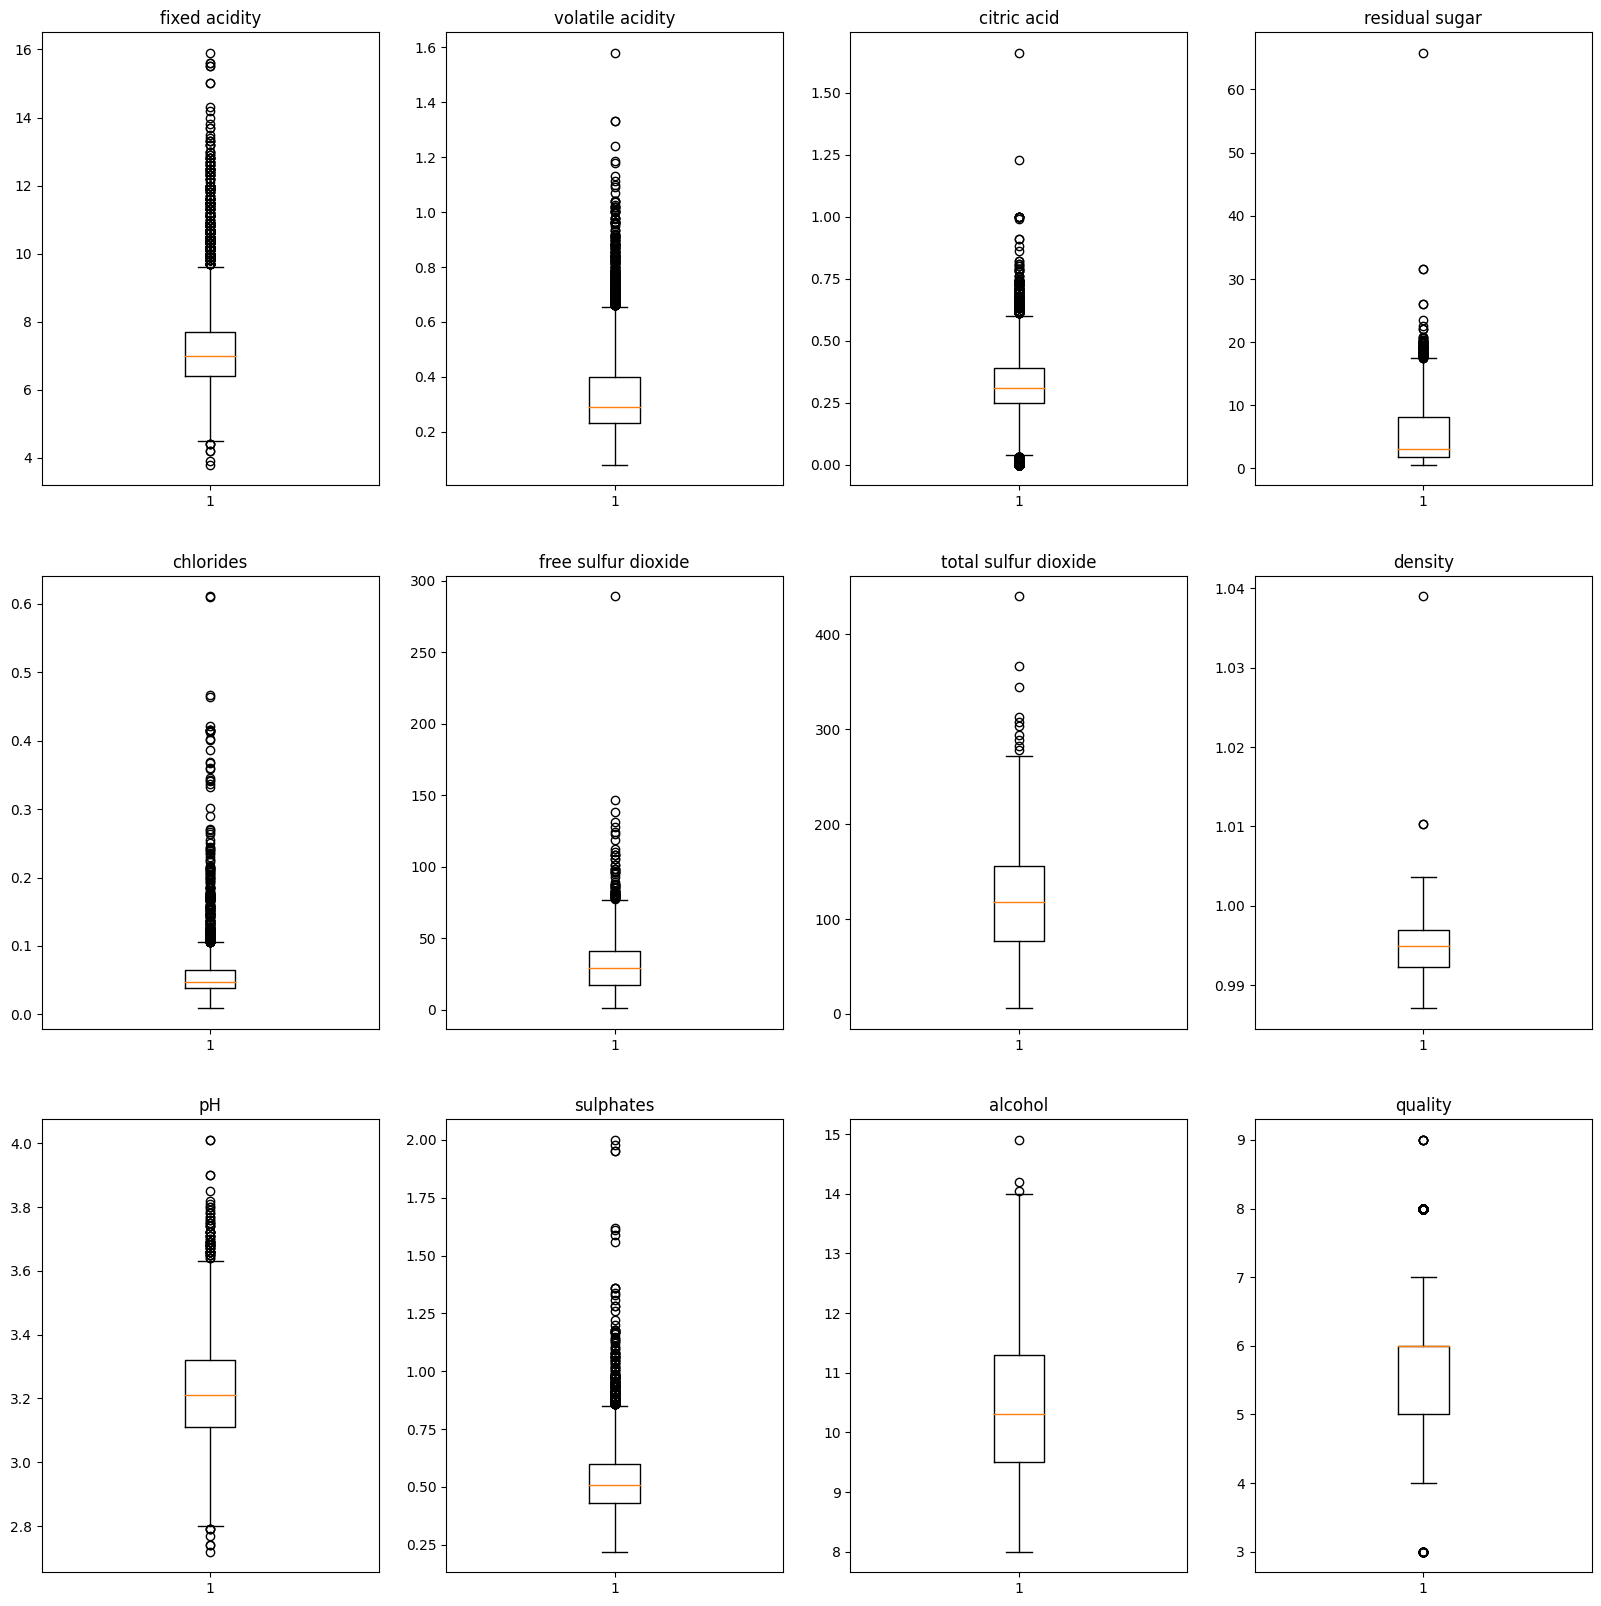

In [34]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(ncols=4, nrows=3, sharey=False, figsize=(20, 20))

for i, (column) in enumerate(wine.columns[:-2]):
    # print(i, column, i//4, i%4)
    ax[i//4, i%4].boxplot(wine[column])
    ax[i//4, i%4].set_title(column)

Looks like we were on the right track with pH and free sulfur dioxide. pH has a big box and few outliers, free sulfur dioxide has one major outlier. We could have done better though, looking at the box plots alcohol has next to no outliers, and chlorides a _lot_ of them.

Also note how there are little to no outliers on the low end, so we can safely ignore the minimal-values.

Next up it would be nice to see if the outlier for volatile acidity, citric acid,residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide and density (they all have one very distinguished outlier) are the same wine. This could indicate a badly measured wine. If not we could live with dropping all of those outliers, as we have 6497 records.

Let's show the records first and go from there. Show the entire row, but make sure you know which is the column that is responsible.

In [49]:
print_df = pd.DataFrame()

for i, (column) in enumerate(wine.columns[:-2]):
    # temp_df.append(wine[wine[column]==wine[column].max()])
    temp_df = wine[wine[column]==wine[column].max()].copy()
    temp_df["max_col"] = column
    print_df = pd.concat([print_df, temp_df], axis=0, ignore_index=True)

print_df.sort_values(by="density")

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red,white,max_col
13,6.6,0.360,0.29,1.6,0.021,24.0,85.0,0.98965,3.41,0.61,12.4,9,0,1,quality
15,6.9,0.360,0.34,4.2,0.018,57.0,119.0,0.98980,3.28,0.36,12.7,9,0,1,quality
16,7.1,0.260,0.49,2.2,0.032,31.0,113.0,0.99030,3.37,0.42,12.9,9,0,1,quality
14,7.4,0.240,0.36,2.0,0.031,27.0,139.0,0.99055,3.28,0.48,12.5,9,0,1,quality
2,7.4,0.200,1.66,2.1,0.022,34.0,113.0,0.99165,3.26,0.55,12.2,6,0,1,citric acid
9,5.0,0.740,0.00,1.2,0.041,16.0,46.0,0.99258,4.01,0.59,12.5,6,1,0,pH
8,5.4,0.740,0.00,1.2,0.041,16.0,46.0,0.99258,4.01,0.59,12.5,6,1,0,pH
5,6.1,0.260,0.25,2.9,0.047,289.0,440.0,0.99314,3.44,0.64,10.5,3,0,1,free sulfur dioxide
6,6.1,0.260,0.25,2.9,0.047,289.0,440.0,0.99314,3.44,0.64,10.5,3,0,1,total sulfur dioxide
1,7.6,1.580,0.00,2.1,0.137,5.0,9.0,0.99476,3.50,0.40,10.9,3,1,0,volatile acidity


If you sort the above result by a column with long values, like density, you'll note that some rows are in there twice. For following values, the same wines have the maximum value:

* free and total sulfur dioxide
* alcohol and fixed acidity
* density and residual sugar

This means we won't be deleting 16 rows but slightly less. Especially if we don't remove the lines with the best quality: there are 4 of them and as that is the trait we want to maximize, we really want to keep these rows.

Do you think we should proceed on this course? Delete the 10-ish rows, look at the boxplots, maybe delete some more? Were will that lead us?

Turn on some [thinking music](https://www.youtube.com/watch?v=oPVte6aMprI) and reminiscence on this.

Don't start deleting lines. Use statiscal analysis. The [Z-score](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.zscore.html) of a value says if it's outside of the 3-quartile range, so any data out of this range will surely be an outlier. Let's check how much data we'd lose if applying this to all columns except for quality (and red and white, but they don't matter, as you can surely explain).

The results will be to big to show here. Export them to a CSV to investigate.

In [62]:
from scipy import stats

print_df = pd.DataFrame()

for i, (column) in enumerate(wine.columns[:-3]):
    temp_df = wine[stats.zscore(wine[column]) > 3].copy()
    temp_df["max_col"] = column
    print_df = pd.concat([print_df, temp_df], axis=0, ignore_index=True)

print_df.to_csv("outliers.csv")
print_df.sort_values(by="max_col")

# wine[(np.abs(stats.zscore(wine)) > 3).any(axis=1)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red,white,max_col
539,6.4,0.35,0.28,1.6,0.037,31.0,113.0,0.98779,3.12,0.40,14.2,7,0,1,alcohol
538,15.9,0.36,0.65,7.5,0.096,22.0,71.0,0.99760,2.98,0.84,14.9,5,1,0,alcohol
305,9.8,0.50,0.49,2.6,0.250,5.0,20.0,0.99900,3.31,0.79,10.7,6,1,0,chlorides
306,8.3,0.49,0.36,1.8,0.222,6.0,16.0,0.99800,3.18,0.60,9.5,6,1,0,chlorides
307,8.6,0.49,0.51,2.0,0.422,16.0,62.0,0.99790,3.03,1.17,9.0,5,1,0,chlorides
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,8.1,0.87,0.00,2.2,0.084,10.0,31.0,0.99656,3.25,0.50,9.8,5,1,0,volatile acidity
176,6.3,0.98,0.01,2.0,0.057,15.0,33.0,0.99488,3.60,0.46,11.2,6,1,0,volatile acidity
175,7.8,0.91,0.07,1.9,0.058,22.0,47.0,0.99525,3.51,0.43,10.7,6,1,0,volatile acidity
183,8.3,1.02,0.02,3.4,0.084,6.0,11.0,0.99892,3.48,0.49,11.0,3,1,0,volatile acidity


Group the rows you're about to delete by the column based on which they'll be deleted. How many are there per type?

In [63]:
print_df.groupby(by="max_col").count()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red,white
max_col,,,,,,,,,,,,,,
alcohol,2,2,2,2,2,2,2,2,2,2,2,2,2,2
chlorides,107,107,107,107,107,107,107,107,107,107,107,107,107,107
citric acid,28,28,28,28,28,28,28,28,28,28,28,28,28,28
density,3,3,3,3,3,3,3,3,3,3,3,3,3,3
fixed acidity,128,128,128,128,128,128,128,128,128,128,128,128,128,128
free sulfur dioxide,36,36,36,36,36,36,36,36,36,36,36,36,36,36
pH,32,32,32,32,32,32,32,32,32,32,32,32,32,32
residual sugar,26,26,26,26,26,26,26,26,26,26,26,26,26,26
sulphates,75,75,75,75,75,75,75,75,75,75,75,75,75,75


You'll be deleting a lot because of chlorides and fixed acidity, so you could reconsider these. Alcohol, density and total sulfur dioxide are no-brainers.

But hey, lets delete them all and look at the box plots again.

In [64]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  red                   6497 non-null   int64  
 13  white                 6497 non-null   int64  
dtypes: float64(11), int64(3)
memory usage: 710.7 KB


In [65]:
from scipy import stats

print_df = pd.DataFrame()

for i, (column) in enumerate(wine.columns[:-3]):
    wine = wine[stats.zscore(wine[column]) < 3]

wine.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5941 entries, 0 to 6496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         5941 non-null   float64
 1   volatile acidity      5941 non-null   float64
 2   citric acid           5941 non-null   float64
 3   residual sugar        5941 non-null   float64
 4   chlorides             5941 non-null   float64
 5   free sulfur dioxide   5941 non-null   float64
 6   total sulfur dioxide  5941 non-null   float64
 7   density               5941 non-null   float64
 8   pH                    5941 non-null   float64
 9   sulphates             5941 non-null   float64
 10  alcohol               5941 non-null   float64
 11  quality               5941 non-null   int64  
 12  red                   5941 non-null   int64  
 13  white                 5941 non-null   int64  
dtypes: float64(11), int64(3)
memory usage: 696.2 KB


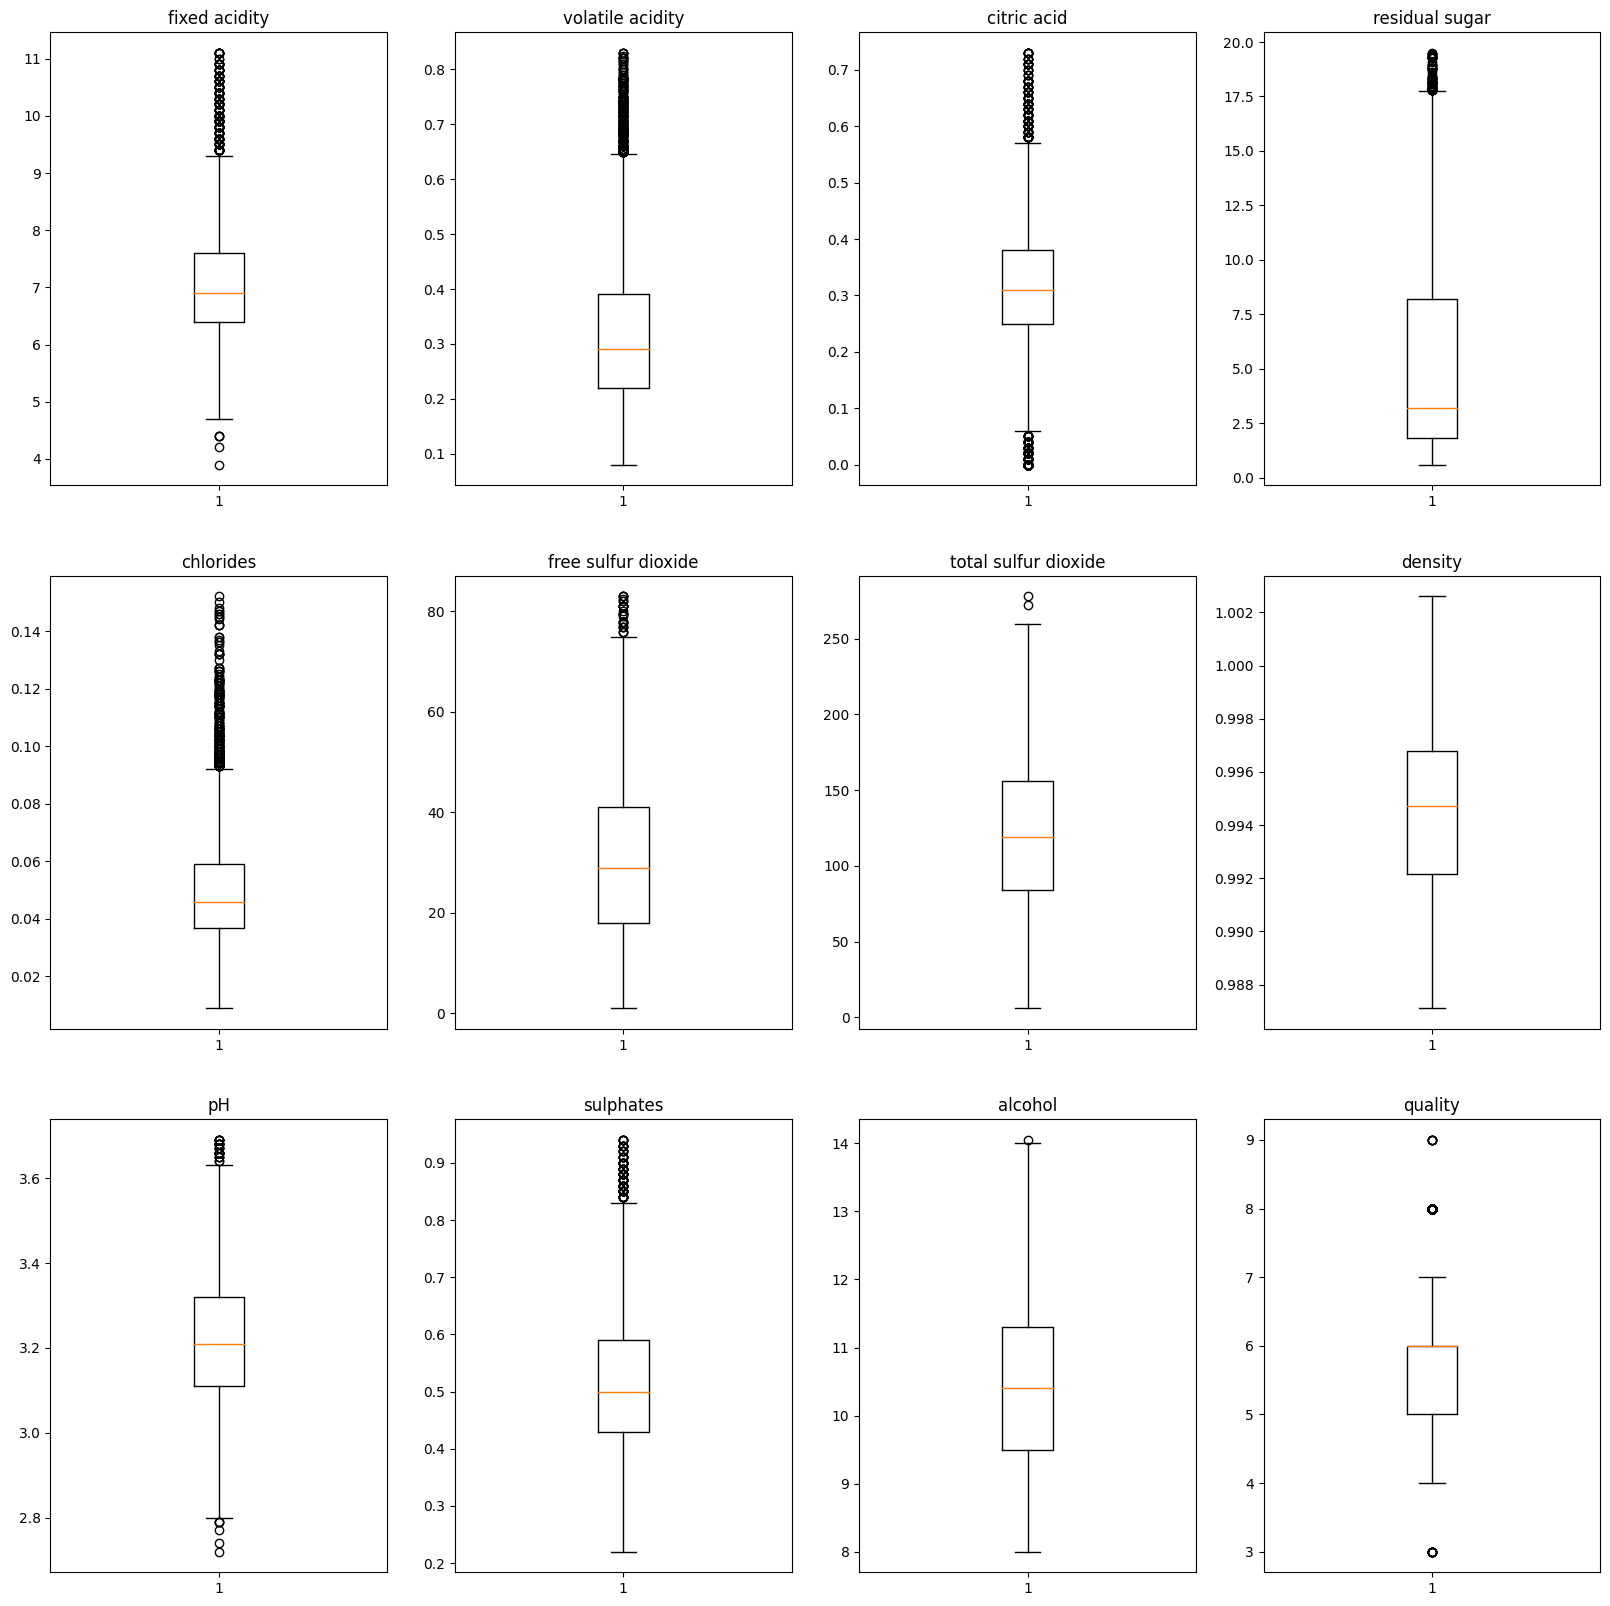

In [66]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(ncols=4, nrows=3, sharey=False, figsize=(20, 20))

for i, (column) in enumerate(wine.columns[:-2]):
    # print(i, column, i//4, i%4)
    ax[i//4, i%4].boxplot(wine[column])
    ax[i//4, i%4].set_title(column)

That's what outlier-free data is supposed to look like!

Next up is scaling. Alcohol is between 14 and 8, which is higher than sulphates which are betwee 0.2 and 0.9. For an AI-model this is confusing, as it seems that alcohol is 10 times more important than sulphates. This process is called normalisation, and it means we recalculate all values to a scale of -1 to +1, or of 0 to 1. You can read all about it [here](https://datagy.io/pandas-normalize-column/).